In [1]:
import sys
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import random
import time
import glob

from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import multiprocessing
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.applications.inception_v3 import InceptionV3

from IPython.display import clear_output

from dealing_with_images import move_files_randomly, delete_files_randomly, copy_resize_images

In [54]:
# recizing and moving files that were created today
import os
import datetime as dt
from pathlib import Path
for label in range(1, 7):
    label = str(label)
    originDir = f'data/original_existence/{label}'
    size = 224
    targetDir = 'data/train_cv_224'

    targetFiles = []

    today = dt.datetime.now().date()
    today = today.strftime("%y%m%d")

    for file in os.listdir(originDir):
        path = Path(originDir+'/'+ file)
        timestamp = dt.datetime.fromtimestamp(path.stat().st_mtime)
        timestamp = timestamp.strftime("%y%m%d")
        if today == timestamp:
            print(file)
            targetFiles.append(file)

    for file in targetFiles:
        im=Image.open(originDir+'/'+file)
        im = im.resize((size, size))
        im.save(os.path.join(targetDir, os.path.basename(file)[:-4]+".jpg"), "JPEG")

2703_0_0.jpg
2711_0_0.jpg
2586_0_1.jpg
2723_0_0.jpg
2743_0_0.jpg
2574_0_1.jpg
2715_0_0.jpg
2584_0_1.jpg
2713_0_0.jpg
2583_0_1.jpg
2719_0_0.jpg
2587_0_1.jpg
2568_0_1.jpg
2725_0_0.jpg
2733_0_0.jpg
2699_0_0.jpg
2580_0_1.jpg
2730_0_0.jpg
2567_0_1.jpg
2709_0_0.jpg
2695_0_0.jpg
2700_0_0.jpg
2582_0_1.jpg
2741_0_0.jpg
2716_0_0.jpg
2737_0_0.jpg
2729_0_0.jpg
2571_0_1.jpg
2717_0_0.jpg
2566_0_1.jpg
2710_0_0.jpg
2718_0_0.jpg
2577_0_1.jpg
2697_0_0.jpg
2704_0_0.jpg
2740_0_0.jpg
2569_0_1.jpg
2742_0_0.jpg
2701_0_0.jpg
2698_0_0.jpg
2573_0_1.jpg
2720_0_0.jpg
2706_0_0.jpg
2714_0_0.jpg
2739_0_0.jpg
2724_0_0.jpg
2702_0_0.jpg
2736_0_0.jpg
2588_0_1.jpg
2707_0_0.jpg
2578_0_1.jpg
2579_0_1.jpg
2708_0_0.jpg
2722_0_0.jpg
2712_0_0.jpg
2570_0_1.jpg
2726_0_0.jpg
2728_0_0.jpg
2572_0_1.jpg
2721_0_0.jpg
2731_0_0.jpg
2735_0_0.jpg
2585_0_1.jpg
2581_0_1.jpg
2694_0_0.jpg
2705_0_0.jpg
2727_0_0.jpg
2738_0_0.jpg
2565_0_1.jpg
2696_0_0.jpg
2575_0_1.jpg
2589_0_1.jpg
2734_0_0.jpg
2576_0_1.jpg
2732_0_0.jpg
373_0_3.jpg
295_0_3.jpg
2

300_0_6.jpg
290_0_6.jpg
398_0_6.jpg
266_0_6.jpg
394_0_6.jpg
401_0_6.jpg
315_0_6.jpg
435_0_6.jpg
288_0_6.jpg
433_0_6.jpg
350_0_6.jpg
283_0_6.jpg
271_0_6.jpg
403_0_6.jpg
421_0_6.jpg
313_0_6.jpg
410_0_6.jpg
294_0_6.jpg
387_0_6.jpg
293_0_6.jpg
344_0_6.jpg
365_0_6.jpg
384_0_6.jpg
331_0_6.jpg
404_0_6.jpg
254_0_6.jpg
245_0_6.jpg
306_0_6.jpg
357_0_6.jpg
244_0_6.jpg
418_0_6.jpg
332_0_6.jpg
423_0_6.jpg
432_0_6.jpg
376_0_6.jpg
322_0_6.jpg
355_0_6.jpg
239_0_6.jpg
321_0_6.jpg
358_0_6.jpg
328_0_6.jpg
388_0_6.jpg
369_0_6.jpg
415_0_6.jpg
325_0_6.jpg
260_0_6.jpg
253_0_6.jpg
272_0_6.jpg
360_0_6.jpg
312_0_6.jpg
248_0_6.jpg
382_0_6.jpg
326_0_6.jpg
284_0_6.jpg
347_0_6.jpg
383_0_6.jpg
250_0_6.jpg
346_0_6.jpg
274_0_6.jpg
378_0_6.jpg
393_0_6.jpg
247_0_6.jpg
333_0_6.jpg
320_0_6.jpg
299_0_6.jpg
295_0_6.jpg
366_0_6.jpg
340_0_6.jpg
267_0_6.jpg
431_0_6.jpg
380_0_6.jpg
390_0_6.jpg
249_0_6.jpg
424_0_6.jpg
397_0_6.jpg
381_0_6.jpg
343_0_6.jpg
354_0_6.jpg
416_0_6.jpg
286_0_6.jpg
374_0_6.jpg
289_0_6.jpg
436_0_6.jpg
287_

In [4]:
originDir = 'data/train_224/'
targetDir = 'data/valid_224/'
for i in [0, 1]:
    move_files_randomly(503, originDir+str(i), targetDir+str(i))

In [18]:
label = '6'
# Taking images for training and validation

directory = f'data/original_existence/{label}'
os.makedirs(directory, exist_ok=True) # recursive

video = cv2.VideoCapture(0)

filename = len(os.listdir(directory))
count = 0

# imagecount = 546-250

while True and count < 100:
    time.sleep(0.25)
    print('count', count)
    filename += 1
    count += 1
#     imagecount -= 1
    ret, frame = video.read()
    RGB_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(RGB_img)
    im = im.resize((350, 350))
    im.save(os.path.join(directory, str(filename)+f"_0_{label}.jpg"), "JPEG")
#     cv2.imwrite(os.path.join(directory, str(filename)+".jpg"), frame)
    
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

count 0
count 1
count 2
count 3
count 4
count 5
count 6
count 7
count 8
count 9
count 10
count 11
count 12
count 13
count 14
count 15
count 16
count 17
count 18
count 19
count 20
count 21
count 22
count 23
count 24
count 25
count 26
count 27
count 28
count 29
count 30
count 31
count 32
count 33
count 34
count 35
count 36
count 37
count 38
count 39
count 40
count 41
count 42
count 43
count 44
count 45
count 46
count 47
count 48
count 49
count 50
count 51
count 52
count 53
count 54
count 55
count 56
count 57
count 58
count 59
count 60
count 61
count 62
count 63
count 64
count 65
count 66
count 67
count 68
count 69
count 70
count 71
count 72
count 73
count 74
count 75
count 76
count 77
count 78
count 79
count 80
count 81
count 82
count 83
count 84
count 85
count 86
count 87
count 88
count 89
count 90
count 91
count 92
count 93
count 94
count 95
count 96
count 97
count 98
count 99


In [8]:
size = 128

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(size, size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [9]:
model.compile(optimizer=optimizers.RMSprop(lr=0.0003),
             loss='binary_crossentropy', metrics=['acc'])

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.255)

In [11]:
train_generator = train_datagen.flow_from_directory('data/train',
    target_size=(size, size), batch_size=64, class_mode='binary')

validation_generator = validation_datagen.flow_from_directory('data/valid',
    target_size=(size, size), batch_size=64, class_mode='binary')

Found 5044 images belonging to 2 classes.
Found 562 images belonging to 2 classes.


In [17]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

with tf.device('/device:GPU:0'):
    history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=63, 
                    validation_data=validation_generator,
                   validation_steps=7,
                    callbacks=[early_stopping_monitor])

Epoch 1/10
63/63 [==============================] - 42s 658ms/step - loss: 0.0728 - acc: 0.9749 - val_loss: 63.4000 - val_acc: 0.9196
Epoch 2/10
63/63 [==============================] - 47s 741ms/step - loss: 0.0730 - acc: 0.9721 - val_loss: 62.4944 - val_acc: 0.8683
Epoch 3/10
63/63 [==============================] - 45s 713ms/step - loss: 0.0658 - acc: 0.9786 - val_loss: 15.7438 - val_acc: 0.9643
Epoch 4/10
63/63 [==============================] - 46s 719ms/step - loss: 0.0740 - acc: 0.9756 - val_loss: 12.0685 - val_acc: 0.9799
Epoch 5/10
63/63 [==============================] - 44s 690ms/step - loss: 0.0538 - acc: 0.9794 - val_loss: 22.7302 - val_acc: 0.9531


In [42]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [24]:
def plot_model_data(history, filename=None):
    """plotting the model data
    history - history object returned from model.fit() or model.fit_generator()
    filename - name of the file where you want to save the plots if you do"""
    if filename != None:
        pp = PdfPages(filename+'.pdf')
        
    x_data = range(1,len(list(history.history.values())[0])+1)
    x_label = 'number of epochs'
    for y_label_sets in [['loss', 'val_loss'], ['acc', 'val_acc']]:
        figure = plt.figure()
        for y_label in y_label_sets:
            plt.plot(x_data, history.history[y_label], label=y_label)
        plt.xlabel(x_label)
        plt.legend()
        pp.savefig(figure)
        plt.show()
    
    try:
        pp.close()
    except:
        pass

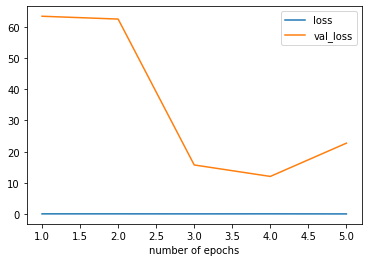

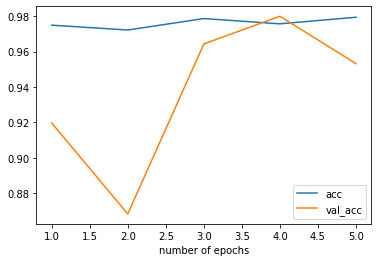

In [25]:
plot_model_data(history, 'selfModel_VGG_like')

In [19]:
# model = models.load_model('personExistenceClassifier.tf')
model.save('selfModel_VGG_like.tf', save_format='tf')

INFO:tensorflow:Assets written to: selfModel_VGG_like.tf/assets


In [ ]:
# Taking images for training and validation

directory = 'data/original/1'
os.makedirs(directory, exist_ok=True) # recursive

video = cv2.VideoCapture(0)

filename = len(os.listdir(directory))
count = 0

imagecount = 546-250

while True and count < 250:
    time.sleep(0.25)
    print('count', count)
    filename += 1
    count += 1
    imagecount -= 1
    ret, frame = video.read()
    RGB_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(RGB_img)
    im = im.resize((256, 256))
    im.save(os.path.join(directory, str(filename)+"_3.jpg"), "JPEG")
#     cv2.imwrite(os.path.join(directory, str(filename)+".jpg"), frame)
    
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

In [2]:
#Load the saved model
model = models.load_model('selfModel_VGG_like.tf')
video = cv2.VideoCapture(0)

while True:
    _, frame = video.read()
    RGB_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(frame)
    im = im.resize((128, 128))
    img_array = np.array(im)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = int(model.predict(img_array)[0][0])
    plt.imshow(RGB_img)
    plt.show()
    if prediction == 0:
        print('You ARE here')
    else:
        print('You are NOT here')
    clear_output(wait=True)

video.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [4]:
model.save('existenceModel.h5')

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False

pool_2d = GlobalAveragePooling2D(name='pool_2d')(base_model.output)
dense = Dense(1024, name='dense1', activation='relu')(pool_2d)
predictions = Dense(len(idx_to_labels), activation='softmax')(dense)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()